In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#veri setlerinin yolları
train_dir = r"C:\Users\Acer\Desktop\Cattle Breeds\train"      
test_dir = r"C:\Users\Acer\Desktop\Cattle Breeds\test"      

In [3]:
#veri önişleme
train_datagen = ImageDataGenerator(              
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1300 images belonging to 5 classes.
Found 153 images belonging to 5 classes.


In [4]:
# Eğitim ve test setlerindeki tüm verileri ve etiketleri toplayarak NumPy dizilerine dönüştürüyoruz.
x_train, y_train = [], []
for i in range(len(train_set)):
    images, labels = train_set[i]
    x_train.extend(images)
    y_train.extend(labels)
x_train = np.array(x_train)
y_train = np.array(y_train)                                  


x_test, y_test = [], []
for i in range(len(test_set)):
    images, labels = test_set[i]
    x_test.extend(images)
    y_test.extend(labels)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [5]:
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

In [6]:
# transfer learning kullanarak 5 sınıflı bir sınıflandırma modeli oluşturuyoruz
for layer in base_model.layers[-20:]:
    layer.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax') 
])

In [7]:
# Öğrenme oranı düşürüldü
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [10]:
# modelin eğitim kısmı
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),              

    epochs=50,
    callbacks=[early_stopping, reduce_lr],               
    
)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 64s 925ms/step - accuracy: 0.2380 - loss: 2.5546 - val_accuracy: 0.3333 - val_loss: 1.6501 - learning_rate: 5.0000e-05
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 894ms/step - accuracy: 0.4169 - loss: 1.7476 - val_accuracy: 0.4575 - val_loss: 1.4308 - learning_rate: 5.0000e-05
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 875ms/step - accuracy: 0.5302 - loss: 1.2141 - val_accuracy: 0.5033 - val_loss: 1.2702 - learning_rate: 5.0000e-05
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 871ms/step - accuracy: 0.6123 - loss: 1.0364 - val_accuracy: 0.5294 - val_loss: 1.1615 - learning_rate: 5.0000e-05
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 879ms/step - accuracy: 0.6652 - loss: 0.9042 - val_accuracy: 0.5686 - val_loss: 1.0738 - learning_rate: 5.0000e-05
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 875ms/step - accuracy: 0.7331 - loss: 0.7510 - val_accuracy: 0.5817 - val_loss: 1.0808 - learning_rate: 5.0000e-05
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 884ms/step - acc

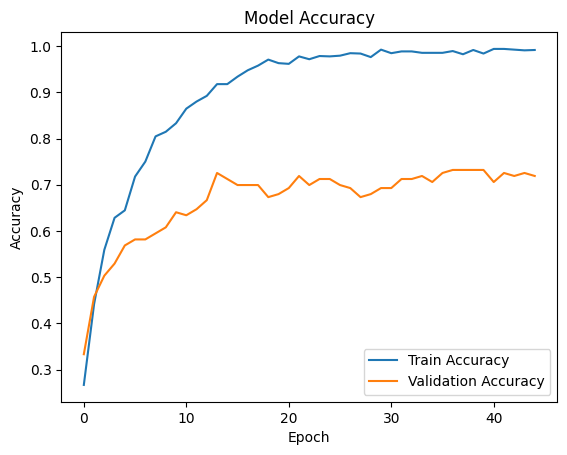

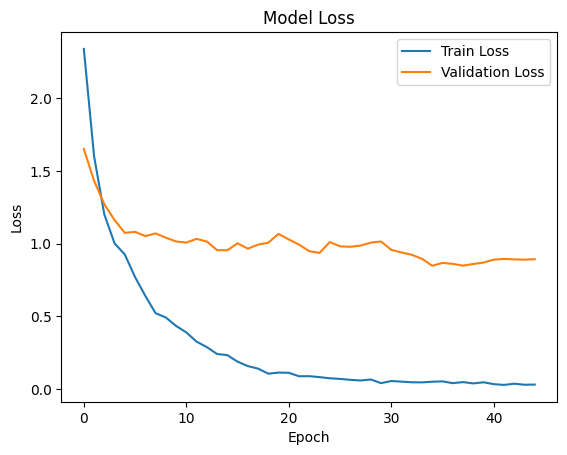

In [11]:
#grafikleri görselleştirmek
plt.plot(history.history['accuracy'], label='Train Accuracy')           
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Class: Ayrshire cattle


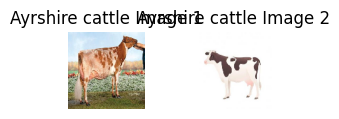

Class: Brown Swiss cattle


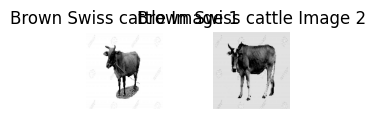

Class: Holstein Friesian cattle


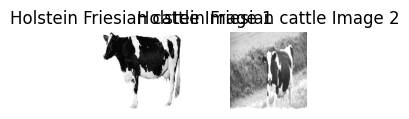

Class: Jersey cattle


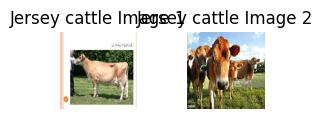

Class: Red Dane cattle


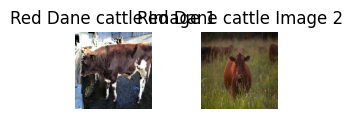

In [3]:
import os  
import random
import matplotlib.pyplot as plt
import tensorflow as tf

test_dir = r"C:\Users\Acer\Desktop\Cattle Breeds\test"


classes = ['Ayrshire cattle', 'Brown Swiss cattle', 'Holstein Friesian cattle', 'Jersey cattle', 'Red Dane cattle']

# veri setinden örnek görseller çağrılması
def show_random_images_from_classes(classes, test_dir, num_images=2):
    for cls in classes:
        cls_dir = os.path.join(test_dir, cls)
        if not os.path.exists(cls_dir):
            print(f"Error: The directory '{cls_dir}' does not exist.")
            continue
        image_files = [os.path.join(cls_dir, f) for f in os.listdir(cls_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
        selected_images = random.sample(image_files, min(num_images, len(image_files)))
        
        print(f"Class: {cls}")
        fig, axes = plt.subplots(1, len(selected_images), figsize=(3, 1))
        for i, image_path in enumerate(selected_images):
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_title(f"{cls} Image {i+1}")
        plt.show()
  
show_random_images_from_classes(classes, test_dir)


In [12]:
model.save("cattle_classification_with_finetuning_and_class_weight.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Holstein Friesian cattle


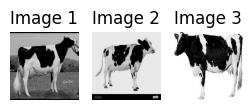

In [2]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Kaydedilmiş modeli yüklüyoruz,bu sayede modeli tekrar egitmeden kullanıyoruz.
model_path = "cattle_classification_with_finetuning_and_class_weight.keras"  
model = tf.keras.models.load_model(model_path)

test_image_path = r"C:\Users\Acer\Desktop\Cattle Breeds\test\Holstein Friesian cattle\HolsteinFriesiancattle1.jpg"
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(128, 128))
test_image = tf.keras.preprocessing.image.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)

classes = ['Ayrshire cattle', 'Brown Swiss cattle', 'Holstein Friesian cattle', 'Jersey cattle', 'Red Dane cattle']
result = model.predict(test_image)
predicted_class = classes[np.argmax(result)]
print("Predicted class:", predicted_class)

test_dir = r"C:\Users\Acer\Desktop\Cattle Breeds\test"

# Tahmin edilen sınıfa ait 3 rastgele resmi gösteriyoruz.
def show_images_from_predicted_class(predicted_class, test_dir, num_images=3):
    predicted_class_dir = os.path.join(test_dir, predicted_class)
    if not os.path.exists(predicted_class_dir):
        print(f"Error: The directory '{predicted_class_dir}' does not exist.")
        return
    image_files = [os.path.join(predicted_class_dir, f) for f in os.listdir(predicted_class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    selected_images = random.sample(image_files, min(num_images, len(image_files)))
    
    fig, axes = plt.subplots(1, len(selected_images), figsize=(3, 1))
    for i, image_path in enumerate(selected_images):
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")
    plt.show()
show_images_from_predicted_class(predicted_class, test_dir)
